In [235]:
import matplotlib.pyplot as plt
from biotite.sequence import Annotation, Feature, Location
import biotite.sequence.graphics as graphics
import biotite.sequence.io.genbank as gb
from matplotlib import rcParams
#requires the region of interest to be labelled as an insert feature in the genbank file


In [236]:
def read_genbank(file_path):
    """
    Read genbank file and return the sequence and annotation
    """

    gb_file = gb.GenBankFile.read(file_path)
    sequence = gb.get_sequence(gb_file)
    annotation = gb.get_annotation(gb_file)

    return sequence, annotation

In [237]:
def feature_map(annotation, feature_list, loc_range):
    """
    Return a feature map of a given feature type
    """

    

    # Get the range of the entire annotation via the *source* feature
    # for feature in annotation:
    #     if feature.key == source_feature_type:
    #         # loc_range has exclusive stop
    #         loc = list(feature.locs)[0]
    #         loc_range = (loc.first, loc.last+1)
    fig = plt.figure(figsize=(12.0, 1.0))
    ax = fig.add_subplot(111)
    annotations = [feature for feature in annotation if feature.key in feature_list]
    print(annotations)
    graphics.plot_feature_map(
        ax,
        annotations,
        multi_line=False,
        loc_range=loc_range,
        #show_line_position=True
    )
    fig.tight_layout()
    #plt.show()
    #save figure as svg
    fig.savefig('../../data/CRISPR_library/visualise_plasmid/image.svg', format='svg', dpi=1200, bbox_inches='tight')




    #return feature_map

In [238]:
#main function
def main():
    #set matplotlib rc parameters

    #set matplotlib default parameters
    rcParams['xtick.major.width'] = 2
    rcParams['ytick.major.width'] = 2
    rcParams['axes.linewidth'] = 2
    rcParams['lines.linewidth'] = 2
    #remove top and right lines
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    #font size
    fontsize = 20
    rcParams['font.size'] = fontsize
    #for getting the microsoft font Arial working, please follow this guide: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']
    #allow font to be edited later in pdf editor
    #make svg text editable
    rcParams['svg.fonttype'] = 'none'
    rcParams ['pdf.fonttype'] = 42 
    #align y-axis top most tick with end of axis
    rcParams['axes.autolimit_mode'] = 'round_numbers'
    #set margins to ensure any error bars fit
    rcParams['axes.xmargin'] = 0.2
    rcParams['axes.ymargin'] = 0.2
    #define bar width
    #bar_width = 0.65
    #allow math text to be displayed
    #rcParams['mathtext.default'] = 'regular'

    
    # Read the genbank file
    file_path = '../../data/CRISPR_library/visualise_plasmid/pepsw2sp0250.gb'
    sequence, annotation = read_genbank(file_path)
    new_annotation_list = []
    #prom  = Feature("regulatory", [Location(10, 50, strand)],
                # {"regulatory_class" : "promoter",
                #  "note"             : "T7"})
    
    #create sub annotation
    for feature in annotation:
       
        # Convert the feature locations in better readable format
        #locs = [str(loc) for loc in sorted(feature.locs, key=lambda l: l.first)]
        if feature.key == 'insert':
            #create a subannotation from the feature's location
            gene_feature = feature
            loc = list(gene_feature.locs)[0]
            loc_range = (loc.first, loc.last+1)
            sub_annot = annotation[loc_range[0]:loc_range[1]]

    for feature in sub_annot:
        locs = [str(loc) for loc in sorted(feature.locs, key=lambda l: l.first)]
        #if promoter or 5UTR, add regulatory_class
        if feature.key == 'promoter':
            #feature.qual['regulatory_class'] = 'promoter'
            #feature.qual['note'] = feature.qual['label']
            new_feature = Feature('regulatory', feature.locs, {'regulatory_class' : 'promoter', 'note' : feature.qual['label']})
            new_annotation_list.append(new_feature)

        elif feature.key == '5UTR':
            # feature.qual['regulatory_class'] = 'five_prime_UTR'
            # feature.qual['note'] = feature.qual['label']
            new_feature = Feature('regulatory', feature.locs, {'regulatory_class' : 'five_prime_UTR', 'note' : feature.qual['label']})
            new_annotation_list.append(new_feature)
        elif feature.key == 'intron':
            # feature.qual['regulatory_class'] = 'intron'
            # feature.qual['note'] = feature.qual['label']
            new_feature = Feature('regulatory', feature.locs, {'regulatory_class' : 'intron', 'note' : feature.qual['label']})
            new_annotation_list.append(new_feature)
        elif feature.key == 'terminator':
            # feature.qual['regulatory_class'] = 'terminator'
            # feature.qual['note'] = feature.qual['label']
            new_feature = Feature('regulatory', feature.locs, {'regulatory_class' : 'terminator', 'note' : feature.qual['label']})
            new_annotation_list.append(new_feature)
        elif feature.key == 'NLS':
            # feature.qual['regulatory_class'] = 'terminator'
            # feature.qual['note'] = feature.qual['label']
            new_feature = Feature('CDS', feature.locs, {'gene' : feature.qual['label']})
            new_annotation_list.append(new_feature)
        elif feature.key == 'Chen scaffold':
            # feature.qual['regulatory_class'] = 'terminator'
            # feature.qual['note'] = feature.qual['label']
            new_feature = Feature('gene', feature.locs, {'gene' : 'Chen scaffold'})
            new_annotation_list.append(new_feature)
        elif feature.key == 'FLAG':
            # feature.qual['regulatory_class'] = 'terminator'
            # feature.qual['note'] = feature.qual['label']
            new_feature = Feature('CDS', feature.locs, {'gene' : 'FLAG'})
            new_annotation_list.append(new_feature)
        elif feature.key == 'CDS':
            # feature.qual['gene'] = feature.qual['label']
            new_feature = Feature('gene', feature.locs, {'gene' : feature.qual['label']})
            new_annotation_list.append(new_feature)
        else:
            new_annotation_list.append(feature)
        
    new_annotation = Annotation(new_annotation_list)
    #print(new_annotation_list)
        
    #print(f"{feature.key}   {feature}")
    #create list of features to include in figure
    feature_list =["CDS","promoter", "Chen scaffold", 'terminator','5UTR','NLS','regulatory','intron','gene','FLAG']
    feature_map(new_annotation,feature_list, loc_range)

[Feature("gene", [Location(2515, 5236, strand=Location.Strand.REVERSE, defect=Location.Defect.NONE)], qual={'gene': 'SpCas9 exon 2'}), Feature("CDS", [Location(6946, 6969, strand=Location.Strand.REVERSE, defect=Location.Defect.NONE)], qual={'gene': 'FLAG'}), Feature("gene", [Location(5424, 6972, strand=Location.Strand.REVERSE, defect=Location.Defect.NONE)], qual={'gene': 'SpCas9 exon 1'}), Feature("CDS", [Location(6922, 6945, strand=Location.Strand.REVERSE, defect=Location.Defect.NONE)], qual={'gene': 'FLAG'}), Feature("regulatory", [Location(286, 352, strand=Location.Strand.FORWARD, defect=Location.Defect.NONE)], qual={'regulatory_class': 'five_prime_UTR', 'note': 'TMV omega'}), Feature("regulatory", [Location(7914, 8115, strand=Location.Strand.FORWARD, defect=Location.Defect.NONE)], qual={'regulatory_class': 'promoter', 'note': 'U6-26'}), Feature("regulatory", [Location(5237, 5423, strand=Location.Strand.FORWARD, defect=Location.Defect.NONE)], qual={'regulatory_class': 'intron', 'not

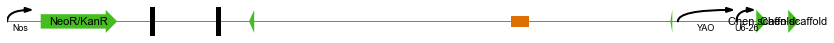

In [239]:
#run main function
if __name__ == '__main__':
    main()

In [240]:

# strand = Location.Strand.FORWARD
# prom  = Feature("regulatory", [Location(10, 50, strand)],
#                 {"regulatory_class" : "promoter",
#                  "note"             : "T7"})
# rbs1  = Feature("regulatory", [Location(60, 75, strand)],
#                 {"regulatory_class" : "ribosome_binding_site",
#                  "note"             : "RBS1"})
# gene1 = Feature("gene", [Location(81, 380, strand)],
#                 {"gene" : "gene1"})
# rbs2  = Feature("regulatory", [Location(400, 415, strand)],
#                 {"regulatory_class" : "ribosome_binding_site",
#                  "note"             : "RBS2"})
# gene2 = Feature("gene", [Location(421, 1020, strand)],
#                 {"gene" : "gene2"})
# term = Feature("regulatory", [Location(1050, 1080, strand)],
#                 {"regulatory_class" : "terminator"})
# annotation = Annotation([prom, rbs1, gene1, rbs2, gene2, term])

# fig = plt.figure(figsize=(8.0, 0.8))
# ax = fig.add_subplot(111)
# graphics.plot_feature_map(
#     ax, annotation, multi_line=False, loc_range=(1, 1101),
# )
# fig.tight_layout()
# plt.show()